In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
# Load data
df = pd.read_csv('survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [15]:
df.columns = ["Gender", "Age", "Smoking", "Yellow Fingers", "Anxiety", "Peer Pressure",
              "Chronic Disease", "Fatigue", "Allergy", "Wheezing", "Alcohol Consuming", "Coughing", "Shortness of Breath", "Swallowing Difficulty", "Chest Pain", "Lung Cancer"]

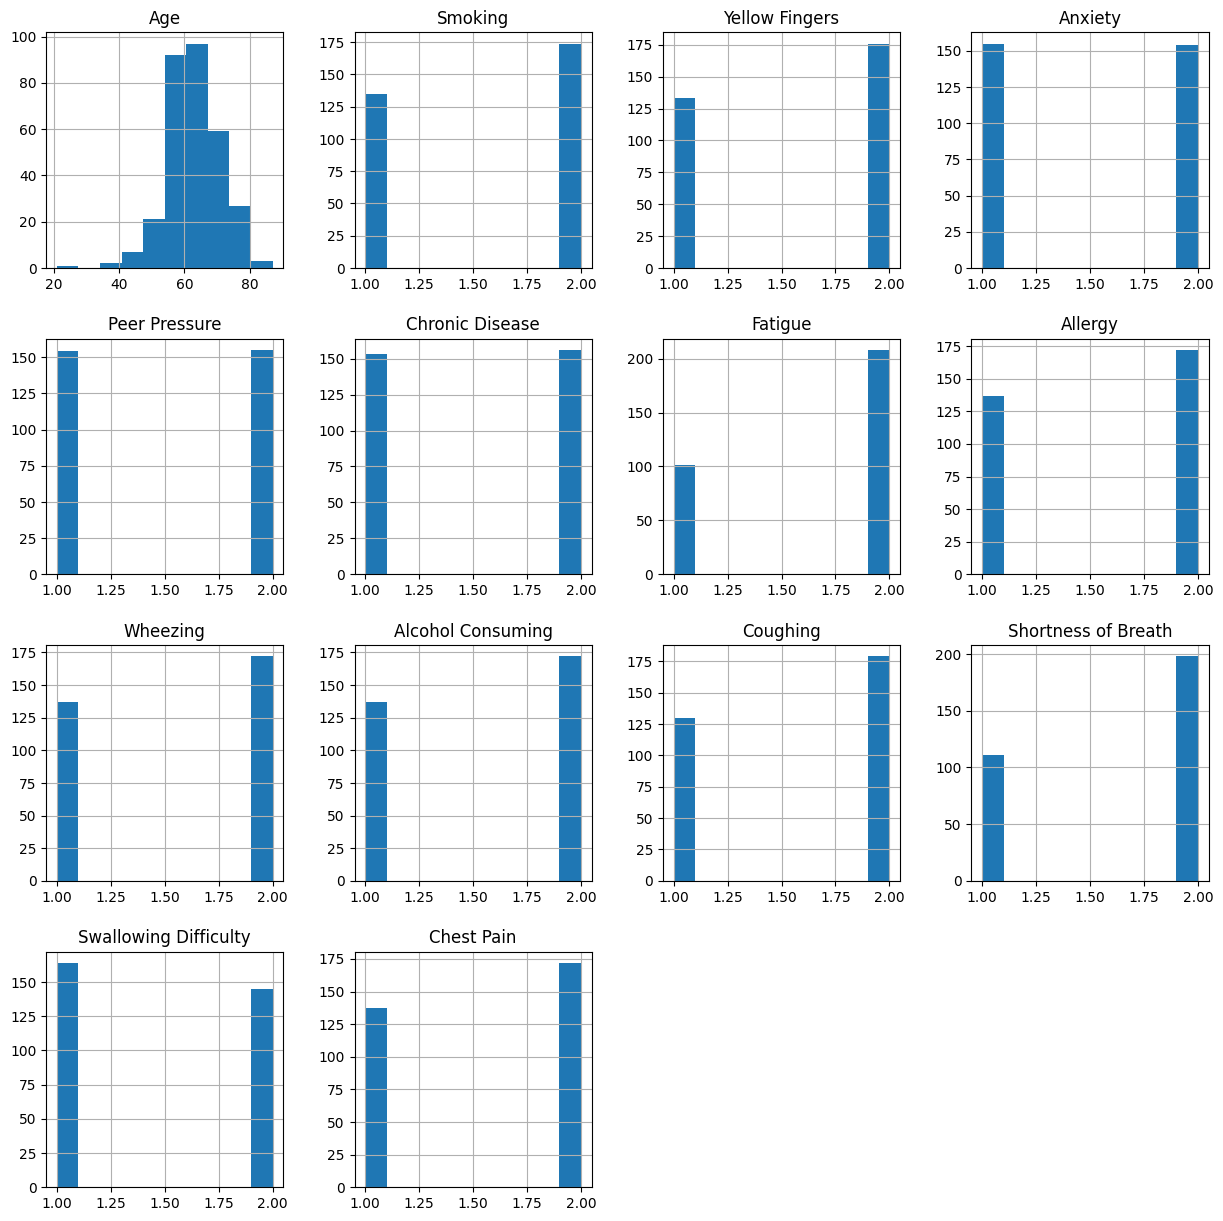

In [16]:
import matplotlib.pyplot as plt
#plots other feature sets
df.hist(figsize=(15,15))
plt.show()

In [17]:
#transforming dataset with dummies variables to replace characters with binary integers
df["Gender"].replace(["M","F"], [0,1], inplace=True)

In [18]:
df.head()

,Gender,Age,Smoking,Yellow Fingers,Anxiety,Peer Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness of Breath,Swallowing Difficulty,Chest Pain,Lung Cancer
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [19]:
#feature set
x = df[["Gender", "Age", "Smoking", "Yellow Fingers", "Anxiety", "Peer Pressure", "Chronic Disease", "Fatigue", "Allergy", "Wheezing", "Alcohol Consuming", "Coughing", "Shortness of Breath", "Swallowing Difficulty", "Chest Pain"]]

#label set
y = df["Lung Cancer"]

In [20]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (216, 15)
Number transactions y_train dataset:  (216,)
Number transactions x_test dataset:  (93, 15)
Number transactions y_test dataset:  (93,)


In [21]:
#Train model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [22]:
#test model
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.956989247311828


In [24]:
# "Gender", "Age", "Smoking", "Yellow Fingers", "Anxiety", "Peer Pressure", "Chronic Disease", "Fatigue", "Allergy", "Wheezing", "Alcohol Consuming", "Coughing", "Shortness of Breath", "Swallowing Difficulty", "Chest Pain"
data = {'Gender':[1], 'Age': [63.0], 'Smoking': [1], 'Yellow Fingers': [2], 'Anxiety': [1], 'Peer Pressure': [2],'Chronic Disease': [1], 'Fatigue':[2], 'Allergy':[2], 'Wheezing':[1], 'Alcohol Consuming':[1], 'Coughing':[2], 'Shortness of Breath':[2], 'Swallowing Difficulty':[1], 'Chest Pain':[2],}
data = pd.DataFrame(data)
prediction = model.predict(data)
if prediction[0] == 0:
    print("No Lung Cancer")
else:
    print("Lung Cancer")

Lung Cancer
